# 案例：使用SVM完成人脸识别

## 下载数据集

In [6]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)


In [7]:
# 画一些人脸，看看需要处理那些数据

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid",palette="pastel",font_scale=1.2)

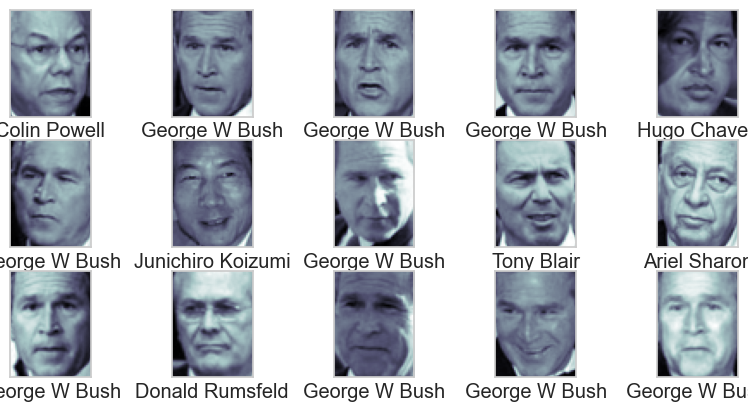

In [9]:
fig, ax = plt.subplots(3, 5)
fig.subplots_adjust(left=0.0625, right=1.2 ,wspace=1)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

使用预处理来提取更有意义的特征。这里使用主成分分析来提取150个基本元素，然后将其提供给支持向量机分类器进行训练。

将这个预处理和分类器打包成管道

In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf')
model = make_pipeline(pca, svc)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,  random_state=42)

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)

In [17]:
grid.fit(X_train, y_train)
print("Best parameters set found on development set:", grid.best_params_)

Best parameters set found on development set: {'svc__C': 5, 'svc__gamma': 0.005}


In [19]:
from sklearn.metrics import accuracy_score

model = grid.best_estimator_
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8635014836795252


比较预测结果和真实结果

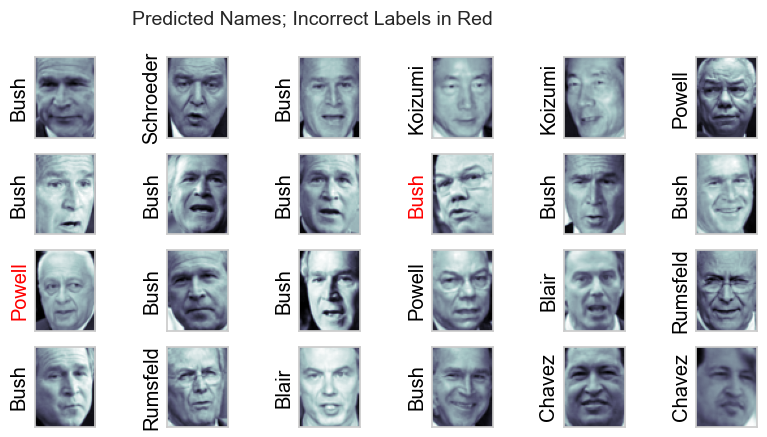

In [20]:
fig, ax = plt.subplots(4, 6)
fig.subplots_adjust(left=0.0625, right=1.2 ,wspace=1)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1], color='black' if y_pred[i] == y_test[i] else'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

打印分类效果报告，他会列举每个标签的统计结果，从而对评估器的性能有更全面的认识

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.86      0.88      0.87        68
  Donald Rumsfeld       0.85      0.71      0.77        31
    George W Bush       0.82      0.94      0.88       126
Gerhard Schroeder       0.95      0.78      0.86        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.90      0.90      0.90        42

         accuracy                           0.86       337
        macro avg       0.91      0.81      0.85       337
     weighted avg       0.87      0.86      0.86       337



画出混淆矩阵，它可以帮助我们清晰的判断那些标签容易被分类器误判

Text(106.44999999999996, 0.5, 'predicted label')

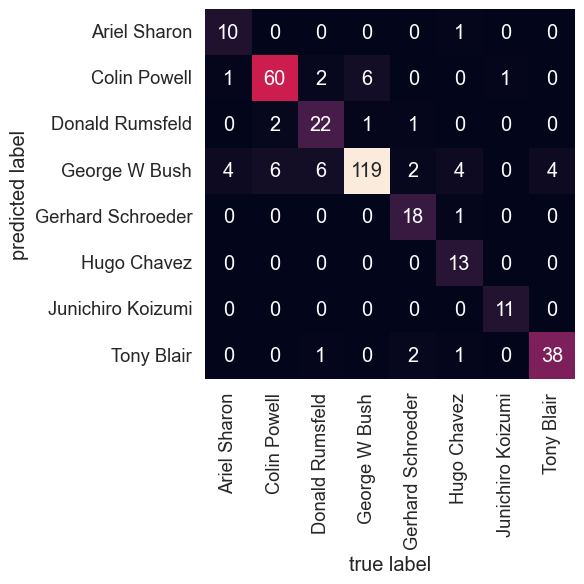

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
